In [11]:
# Import required libraries 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import sys

%load_ext autoreload
%autoreload 2

#Ignore harmless warnings 
import warnings 
warnings.filterwarnings("ignore")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
#from code.arima import arima_util as arima
from code.arima import arima_util as arima
from code import tools as tl

In [42]:
df = pd.read_csv("./data/sales data-set.csv")
df = df.loc[(df['Store'] == 1) & (df['Dept'] == 1)].drop(['Store', 'Dept'], axis = 1)
df['Date'] = pd.to_datetime(df['Date'])
df.to_csv('sample_data.csv', index = False)

In [44]:
df = tl.load_data('./data/sample_data.csv')
df

,Date,Weekly_Sales,IsHoliday
0,2010-05-02,24924.50,False
1,2010-12-02,46039.49,True
2,2010-02-19,41595.55,False
3,2010-02-26,19403.54,False
4,2010-05-03,21827.90,False
...,...,...,...
138,2012-09-28,18947.81,False
139,2012-05-10,21904.47,False
140,2012-12-10,22764.01,False
141,2012-10-19,24185.27,False


#### Load and prepare data

In [75]:
df = tl.load_data('./data/For Naomi.csv') #read in data from file
df = tl.prepare_data(df,'消費日期','消費金額') # select 'ds' and 'y'

In [76]:
df1 = tl.group_by_date(df, 'M','2015-01-01','2020-08-31') # group by date
df1.shape

(68, 3)

#### Split data for testing and spliting

In [66]:
df_tr, df_tst = tl.train_test_split(df1,'2018-12-31','2019-12-31')


train shape (48, 3)
test shape (12, 3)


#### Set parameters for ARIMA model

In [68]:
params = {'start_p': 1,
          'max_p': 16,
          
          'd':None,
          #'max_d':2,
          
          'start_q': 1,
          'max_q': 3,
          
          'start_P': 1,
          'max_P': 5,
    
          'D': None,
          #'max_D': 1,
    
          #'start_Q': 1,
          #'max_Q': 5,
          
          'm': 12,

          #'alpha': 0.05, # default
          'seasonal': True, 
          'stepwise': True,
          'trace':True, 
          'error_action': 'ignore',  # we don't want to know if an order does not work 
          'suppress_warnings': True  # we don't want convergence warnings 
          }

#### Model Training

In [69]:
Arima = arima.Arima_Impl(df_tr)
Arima.find_best_orders( print_summary = False, **params)
Arima.sm_train()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(1,1,1)[12] intercept   : AIC=1322.510, Time=0.37 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=1318.764, Time=0.02 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=1321.308, Time=0.09 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=1321.189, Time=0.06 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=1318.522, Time=0.01 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=1319.750, Time=0.03 sec
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=1319.787, Time=0.03 sec
 ARIMA(0,0,0)(1,1,1)[12] intercept   : AIC=1321.321, Time=0.10 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=1320.341, Time=0.02 sec
 ARIMA(0,0,1)(0,1,0)[12] intercept   : AIC=1320.273, Time=0.02 sec
 ARIMA(1,0,1)(0,1,0)[12] intercept   : AIC=1320.047, Time=0.04 sec

Best model:  ARIMA(0,0,0)(0,1,0)[12]          
Total fit time: 0.787 seconds


#### Predict the data and calculate MAPE

In [70]:
Arima.predict(12,'predicted_revenue')
df_pred = tl.make_dataframe(Arima.predictions.values, df_tst) #prepare data for plotting

print('MAPE: ', tl.mean_absolute_percentage_error(Arima.predictions, df_tst['y']))

MAPE:  0.08779309047385438


#### Prediction Evaluation

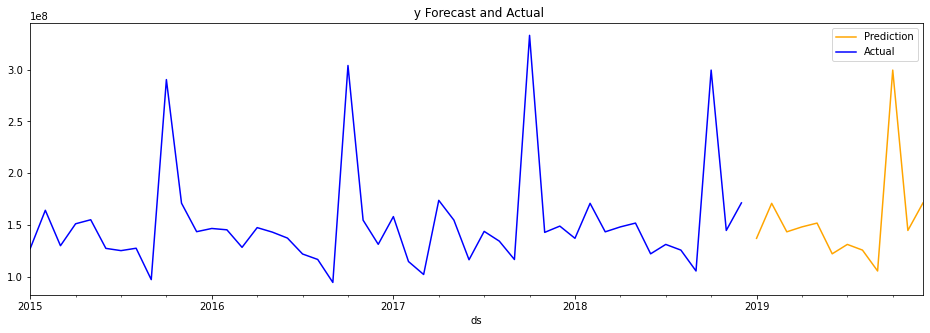

In [73]:
tl.plot_predict_and_actual(df_pred, df_tr)

(12, 2) (12, 3)


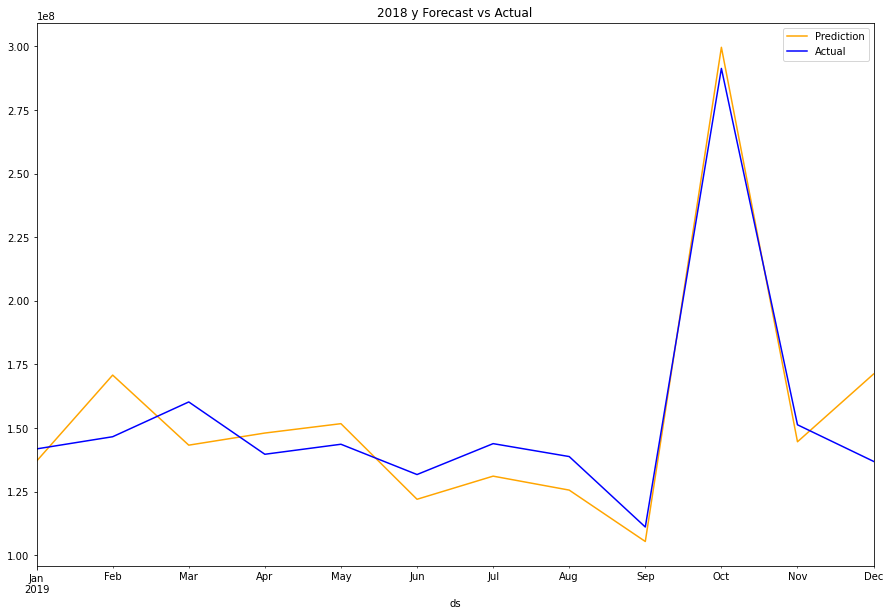

In [74]:
tl.plot_predict_vs_actual(df_pred, df_tst, 'M', '2018-12-31','2019-12-31')